# Choosing the Best Fit with AIK

In this final section, we use the *Akaike Information Criterion (AIC)* (see [Burnham \& Anderson (2002); Bender (2000)](BA.00-References.ipynb)) to select the most efficient polynomial approximation.

## Importing the libraries

In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

## Akaike Information Criterion

Beink $k$ the number of parameters in the model, $N$ the number of data points in the sample, and $E$ the mean quadratic error with the approximation with $k$ parameters, the **Akaike Information Criterion (AIK)** is given by

$$
  \text{AIC} = N\ln(E) + 2k.
$$

The first term decreases with $E$, but the second term penalizes a high number of parameters.

There are a number of other criteria, such as *Bayesian information criterion (BIC)*, *Mallow's $C_p$*, *AICc* (for a low number of samples), *adjusted $R^2$*; *ridge regression*; and *cross validation*.

### AIC for the approximating polynomials

In our case, a polynomial model of degree $j$ has $k=j+1$ parameters. Denoting $E_j$ as the mean quadratic error associated with this polynomial, we find the $\text{AIC}_j$ for each polynomial as

$$
\text{AIC}_j = N\ln(E_j) + 2(j+1).
$$


### Loading the data from file

For the computation of the $\text{AIC}_j$ values, we first load the data from file.

This time, we use `csv` to read only the header of the file, made of the first two rows, and then we use `numpy` to read only the temperature and density values. This is a more efficient way of loading the data.

We start by reading the header:

In [2]:
water_csv_reader = csv.reader(open('water.csv',"r"), delimiter=",")
header_top = [line for line in water_csv_reader if water_csv_reader.line_num < 3]
header = dict([(header_top[0][i],header_top[1][i]) for i in range(3)])
header

{'temp': 'Temperature (C)',
 'density': 'Density (g/cm^3)',
 'viscosity': 'Viscosity (cm^2/s)'}

Next we read the datapoints:

In [3]:
T, f = np.loadtxt(open('water.csv', "r"), delimiter=",", skiprows=2, usecols=(0,1), unpack=True)
N = len(T)
N_half = int(N/2)

### Computing the mean quadratic error

With the data in memory, we compute the $\text{AIC}_j$ values.

In [4]:
A = list()
Err = list()
for j in range(N_half):
    A.append(np.vstack([T**i for i in range(j+1)]).T)
    Err.append(np.linalg.lstsq(A[j], f, rcond=None)[1][0]/N)
    print(f'j={j}: Error={Err[j]:.2e}')    

j=0: Error=1.75e-04
j=1: Error=9.22e-06
j=2: Error=1.33e-07
j=3: Error=3.16e-09
j=4: Error=3.27e-10
j=5: Error=2.64e-10
j=6: Error=2.64e-10


### Computing the AIC values

In [5]:
AIC = [len(T)*np.log(Err[j]) + 2*(j+2) for j in range(N_half)]
for j in range(len(AIC)):
    print(f'j={j}: AIC={AIC[j]:.2f}')

j=0: AIC=-125.74
j=1: AIC=-167.91
j=2: AIC=-229.52
j=3: AIC=-283.59
j=4: AIC=-315.63
j=5: AIC=-316.81
j=6: AIC=-314.83


### Plotting the AIC value

Finally, we plot the AIC values in terms of the degree of the polynomials.

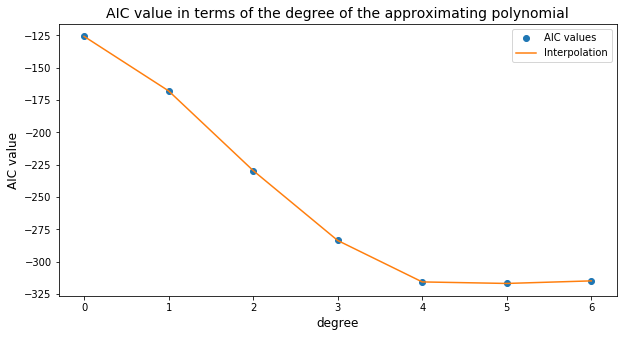

In [6]:
plt.figure(figsize=(10,5))
plt.plot(range(len(AIC)),AIC, 'o', color='tab:blue', label='AIC values')
plt.plot(range(len(AIC)), AIC, color='tab:orange', label='Interpolation')
plt.legend()
plt.xlabel('degree', fontsize=12)
plt.ylabel('AIC value', fontsize=12)
plt.title('AIC value in terms of the degree of the approximating polynomial', fontsize=14)
plt.show()

### Final comments

The use of a model selection criterion such as the AIC is important when we have a large number of data that is not quite accurately approximated by a model. Nevertheless, the exercise above is instructive.